<a href="https://colab.research.google.com/github/Code-Ebullient/retail_sales_analysis/blob/main/Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A Simple Analysis on Retail Sales Dataset

EDA check for accuracy,

(1) (a)check for inconsistencies and errors in the dataset.

(b)Ensure that the data types are properly formatted .

(c)Ensure the Null values are properly dealt with.

In [1]:
# Importing the library

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#### The Business Case

1. (a) Calculate the total sales of the products (each unique product).

  (b) Calculate the average order value (quantity)

2. Use conditional formatting to highlight cells in the total sales column greater than the average value

3. Determine the Top 10 sales

4. plot a chart showing sales by product category.

Understanding these business cases helps to direct us to the goal and the features to focus on.

In [2]:
# Import & read the dataset
data = pd.read_excel("/content/Retail_sales.xlsx")

data.head() # This is to display first five (5) record of the file

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


#### Understanding the Data

The first thing to do on any dataset after the business goal is to understand the given data. This is to enable us to explore the features right.

So from the few record displayed above, we can see that the dataset is about different product purchased last year 2023 by customers from different ages. We have unique products, customers of different sex &ages, and quantity of products purchased.

In [3]:
# Let's take a closer look at the features or column that we have
data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [4]:
# Let's the remove the white space on the headings
data.rename(columns={
    "Transaction ID": "Transaction_ID",
    "Customer ID": "Customer_ID",
    "Product Category": "Product_Category",
    "Price per Unit": "Price_per_Unit",
    "Total Amount": "Total_Amount"
    }, inplace=True)

data.columns

Index(['Transaction_ID', 'Date', 'Customer_ID', 'Gender', 'Age',
       'Product_Category', 'Quantity', 'Price_per_Unit', 'Total_Amount'],
      dtype='object')

In [5]:
# To check the column & row length
data.shape

(99, 9)

#### Data Preparation

This is about creating clean, quality data for analysis which involves **Quality Assurance (QA), & Basic Profiling**

**Quality Assurance** is finding and solving out anything that will affect/skew the analysis like

a. Duplicates

b. Empty /Null values

c. The right data type especially for dates, telephone number, postal codes etc

d. String Trimming / Abbrevitions
e. Outliers


**Data Metrics** Using metrics to profile the dataset (Counts, Mean, Median etc). This is for better understanding of our data.

In [6]:
# Let's check the summary of the record
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    99 non-null     int64         
 1   Date              99 non-null     datetime64[ns]
 2   Customer_ID       99 non-null     object        
 3   Gender            99 non-null     object        
 4   Age               99 non-null     int64         
 5   Product_Category  99 non-null     object        
 6   Quantity          99 non-null     int64         
 7   Price_per_Unit    99 non-null     int64         
 8   Total_Amount      99 non-null     int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 7.1+ KB


In [7]:
# For the statistical anaysis of the features, we use describe
data.describe()

,Transaction_ID,Age,Quantity,Price_per_Unit,Total_Amount
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,50.000000,40.020202,2.525253,188.282828,480.707071
std,28.722813,13.560883,1.109729,192.369969,583.487059
min,1.000000,18.000000,1.000000,25.000000,25.000000
25%,25.500000,28.500000,2.000000,30.000000,82.500000
50%,50.000000,40.000000,3.000000,50.000000,150.000000
75%,74.500000,51.000000,3.500000,300.000000,900.000000
max,99.000000,64.000000,4.000000,500.000000,2000.000000


In [8]:
# Total Count of the Product is 99 & the Conditional count is 37, 31, 31
item_counts = data["Product_Category"].value_counts()
item_counts

Beauty         37
Clothing       31
Electronics    31
Name: Product_Category, dtype: int64

In [9]:
# For the statistical anaysis of the Product_Category
data[["Product_Category"]].describe()

,Product_Category
count,99
unique,3
top,Beauty
freq,37


**Summary**

The details of the dataset shows that there's:

1. No null value or no missing value

2. The features has the right data type ie Age, Price to int data type, product to object data type etc

#### Extract Transform & Load - ETL

1. (a) Total Sales = Quantity * Price

  (b) Average order value (Total / Quantity)


In [10]:
# Most selling Product
data.groupby('Product_Category').agg({'Total_Amount': ['min', 'max'], 'Quantity': 'sum'})

Total_Amount       Quantity
                          min   max      sum
Product_Category                            
Beauty                     30  2000       97
Clothing                   25  1500       76
Electronics                30  2000       77

In [11]:
# Total Sales
data[["Total_Amount"]].sum()

Total_Amount    47590
dtype: int64

In [12]:
# Order Value equal Total Amount / Quantity which is same with the Price per unit
orderValue = data[["Price_per_Unit"]].mean()
orderValue

Price_per_Unit    188.282828
dtype: float64

In [13]:
# Sales greater than average Order Value
greaterSales = data[data["Total_Amount"] > 188.282828]
greaterSales.shape

(46, 9)

In [14]:
# Let's check the Total sales by Date
# Grouping sales by Date
data_trend = data.groupby('Date').sum()['Total_Amount'].reset_index()
data_trend

<ipython-input-14-4ce85003220e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_trend = data.groupby('Date').sum()['Total_Amount'].reset_index()


,Date,Total_Amount
0,2023-01-04,90
1,2023-01-13,30
2,2023-01-14,500
3,2023-01-16,2000
4,2023-01-17,120
...,...,...
78,2023-12-17,1200
79,2023-12-19,600
80,2023-12-24,150
81,2023-12-26,250


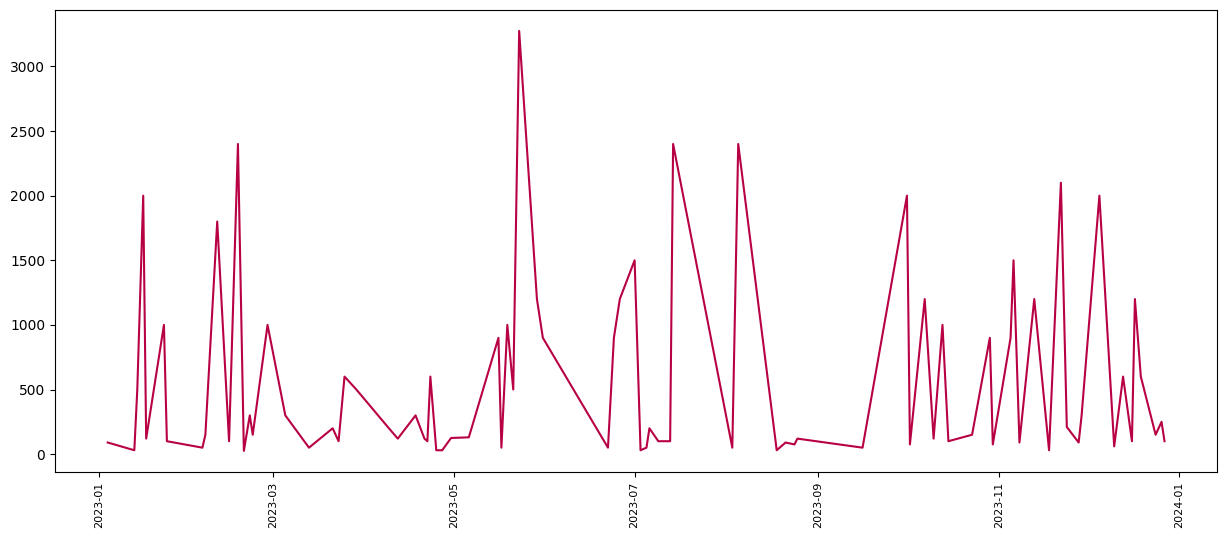

In [15]:
# setting the figure size
plt.figure(figsize=(15,6))
plt.plot(data_trend['Date'],data_trend['Total_Amount'], color = '#b80045')
plt.xticks(rotation = 'vertical', size=8)
plt.show()  # will remove numbers

Line plot with notable **Peaks** & **Valleys**

<Axes: >

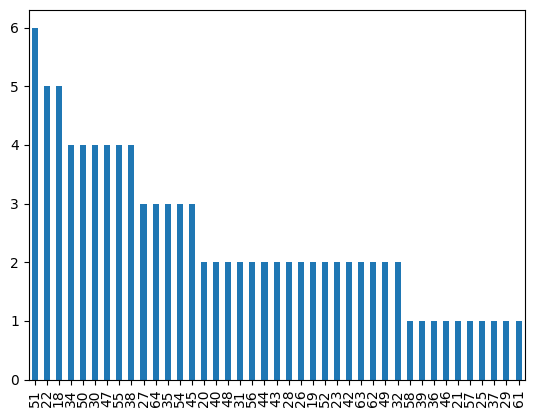

In [16]:
# Total Sales By Age
data["Age"].value_counts().plot(kind="bar")

In [17]:
# Top 10 Sales
top10 = data.groupby('Total_Amount').count().sort_values(by=['Customer_ID', 'Total_Amount'], ascending=[False, True])
print(top10[:10].index.tolist())

[100, 50, 30, 900, 300, 2000, 75, 120, 200, 500]


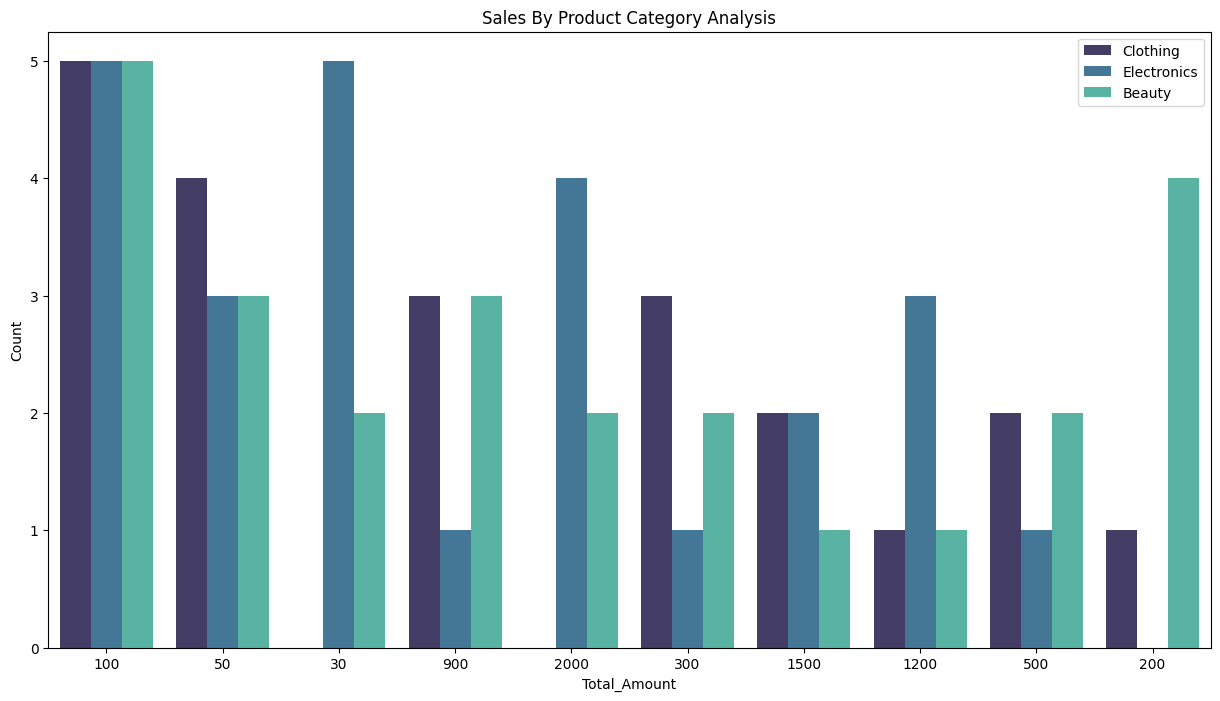

In [18]:
# Top 10 Categories Sales Analysis

plt.figure(figsize=(15,8))
sns.countplot(x='Total_Amount',data=data,palette='mako',hue ='Product_Category',order=data['Total_Amount'].value_counts().index[0:10])
plt.xlabel('Total_Amount')
plt.ylabel('Count')
plt.legend()
plt.title('Sales By Product Category Analysis')
plt.show()

In [19]:
# grouping product category by quantity
prod_sales=pd.DataFrame(data.groupby('Product_Category').sum()['Total_Amount'])
prod_sales

<ipython-input-19-3e60d56d4dab>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prod_sales=pd.DataFrame(data.groupby('Product_Category').sum()['Total_Amount'])


,Total_Amount
Product_Category,
Beauty,15485
Clothing,12105
Electronics,20000


In [20]:
# grouping product category by quantity
most_sell_prod= pd.DataFrame(data.groupby('Product_Category').sum()['Quantity'])
most_sell_prod

<ipython-input-20-57bb7e5f3211>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_sell_prod= pd.DataFrame(data.groupby('Product_Category').sum()['Quantity'])


,Quantity
Product_Category,
Beauty,97
Clothing,76
Electronics,77


In [21]:
# Grouping category and gender
cat_gender = pd.DataFrame(data.groupby(['Product_Category','Gender']).sum()['Total_Amount'])
cat_gender

<ipython-input-21-6ef9004156bc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cat_gender = pd.DataFrame(data.groupby(['Product_Category','Gender']).sum()['Total_Amount'])


Total_Amount
Product_Category Gender              
Beauty           Female         12685
                 Male            2800
Clothing         Female          5765
                 Male            6340
Electronics      Female         12980
                 Male            7020

#### Exploratory Data Analyis

Should answer these questions:

1. How does performance compare across different categories?

  (a) What products generate highest sales ie most selling product?

  (b) What category of products is in demand for both gender?

  (c) What is the peak month for sales?


2. Are there any relationship or correlation among the variables?

3. How are the data distributed, any outliers?